In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# load the dataset
df=pd.read_csv("Retailsales.csv")
print("Dataset Loaded Successful")
df.head()

Dataset Loaded Successful


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,T0001,01-03-2025,C001,Male,34.0,Electronics,2.0,150.0,300.0
1,T0002,02-03-2025,C002,Female,28.0,Apparel,1.0,50.0,50.0
2,T0003,03-03-2025,C003,Male,45.0,Home Goods,3.0,30.0,90.0
3,T0004,04-03-2025,C004,Female,32.0,Beauty,4.0,20.0,80.0
4,T0005,05-03-2025,C005,Male,38.0,Electronics,1.0,200.0,200.0


In [17]:
#Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,T0001,2025-01-03,C001,Male,34.0,Electronics,2.0,150.0,300.0
1,T0002,2025-02-03,C002,Female,28.0,Apparel,1.0,50.0,50.0
2,T0003,2025-03-03,C003,Male,45.0,Home Goods,3.0,30.0,90.0
3,T0004,2025-04-03,C004,Female,32.0,Beauty,4.0,20.0,80.0
4,T0005,2025-05-03,C005,Male,38.0,Electronics,1.0,200.0,200.0


In [29]:
# Aggregate sales data by month and category
df_grouped = df.groupby([df['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().unstack()
df_grouped.index = df_grouped.index.astype(str)# Convert Period index to string
df_grouped =  df_grouped.fillna(50)
print("Aggregate Monthly sales data:")
print(df_grouped.head())

Aggregate Monthly sales data:
Product Category  Apparel  Beauty  Electronics  Food & Beverage  Home Goods
Date                                                                       
2025-01              50.0    50.0        300.0             50.0        50.0
2025-02              50.0    50.0         50.0             50.0        50.0
2025-03              50.0    50.0         50.0             50.0        90.0
2025-04              50.0    80.0         50.0             50.0        50.0
2025-05              50.0    50.0        200.0             50.0        50.0


<Figure size 600x800 with 0 Axes>

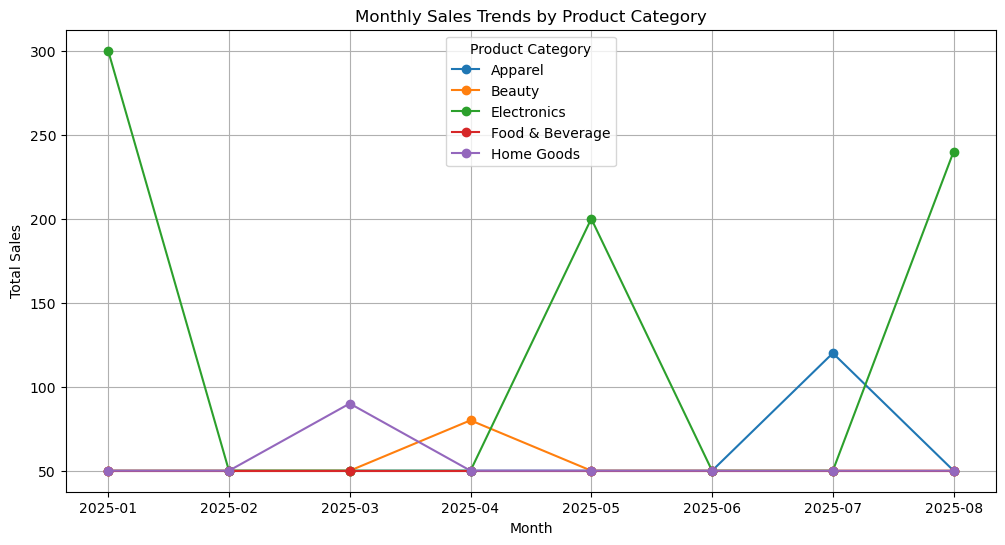

In [31]:
plt.figure(figsize=(6,8))
df_grouped.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

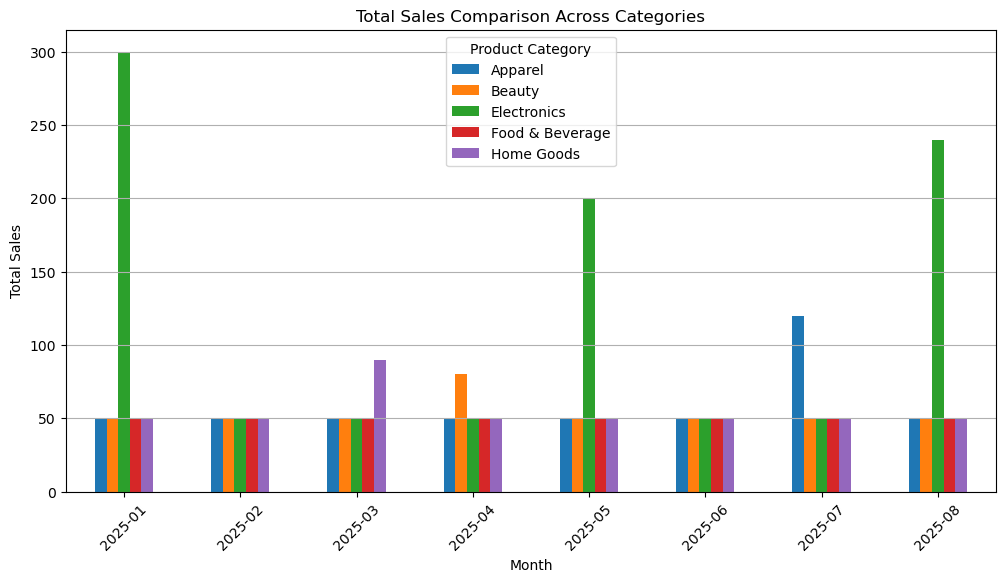

In [33]:
plt.figure(figsize=(10,6))
df_grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Sales Comparison Across Categories')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

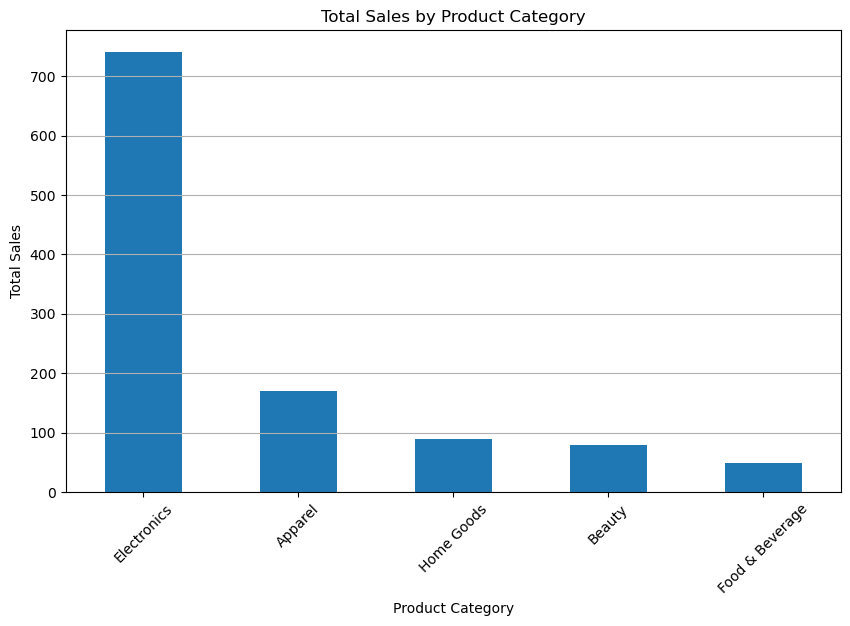

In [35]:
# overall total sales by product category
df_category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
df_category_sales.plot(kind='bar', figsize=(10,6))
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

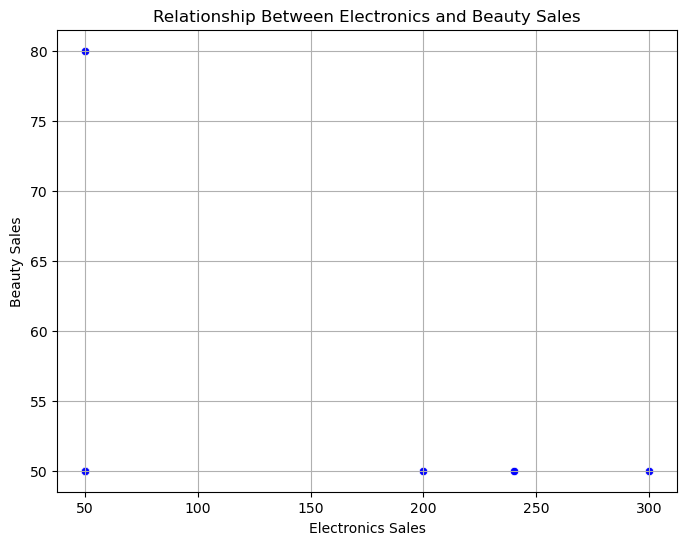

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_grouped['Electronics'], y=df_grouped['Beauty'], color='blue')
plt.title('Relationship Between Electronics and Beauty Sales')
plt.xlabel('Electronics Sales')
plt.ylabel('Beauty Sales')
plt.grid(True)
plt.show()

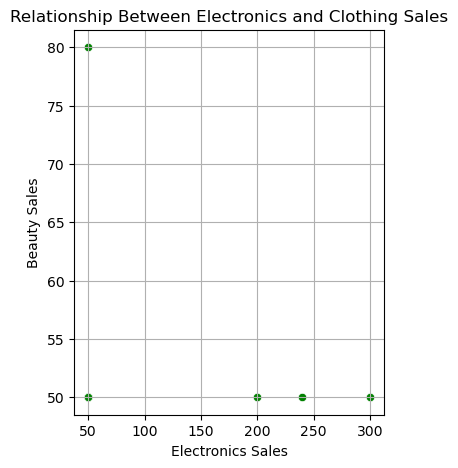

In [43]:
# analyze the relationship between sales of Electronics and clothin products
plt.figure(figsize=(4,5))
sns.scatterplot(x=df_grouped['Electronics'], y=df_grouped['Beauty'], color='green')
plt.title('Relationship Between Electronics and Clothing Sales')
plt.xlabel('Electronics Sales')
plt.ylabel('Beauty Sales')
plt.grid(True)
plt.show()